##### Information Theory (Fall 2023/4)

# Home Assignment 1

#### Topics:
Information Measures

#### Due: 9/1/2024 by class time

#### Instructions:
- Write your names, Student IDs, and date in the cell below.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (recommended) or submit additional notes.
- Logarithm is in base $2$ unless stated otherwise.
- For chain of equalities or inequalities, make sure to explain every non-trivial transition.

## $\LaTeX$ definitions
$
\newcommand{\ex}[1]{\mathbb E \left[#1\right]}
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
\newcommand{\Ycal}{\mathcal Y}
\newcommand{\Xcal}{\mathcal X}
\newcommand{\Zcal}{\mathcal Z}
\newcommand{\Wcal}{\mathcal W}
\newcommand{\reals}{\mathbb R}
$


## $\LaTeX$ re-definitions
$
\renewcommand{\Id}{{\mathbf{I}}}  
\renewcommand{\SSE}{\mathsf{SSE}}
\renewcommand{\SSR}{\mathsf{SSR}}
\renewcommand{\MSE}{\mathsf{MSE}}
\renewcommand{\simiid}{\overset{iid}{\sim}}
\renewcommand{\ex}[1]{\mathbb E \left[#1\right]}
\renewcommand{\var}{\mathrm{Var}}
\renewcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\renewcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\renewcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\renewcommand{\Ncal}{\mathcal N}
\renewcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\renewcommand{\rank}{\operatorname{rank}}
\renewcommand{\tr}{\operatorname{Tr}}
\renewcommand{\diag}{\operatorname{diag}}
\renewcommand{\sign}{\operatorname{sign}}
\renewcommand{\Ycal}{\mathcal Y}
\renewcommand{\Xcal}{\mathcal X}
\renewcommand{\Zcal}{\mathcal Z}
\renewcommand{\Wcal}{\mathcal W}
\renewcommand{\reals}{\mathbb R}
$

### 1. Information Content (credit to CMU 10-704)
You are given 12 balls, all equal in weight except for one that is either heavier or lighter. You are also given a two-pan balance to use. In each use of the balance you may put any number of the 12 balls on the left pan, and the same number on the right pan. There are three possible outcomes: either the weights are equal, or the balls on the left are heavier, or the balls on the left are lighter. The goal is to come up with a strategy to determine which is the odd ball and whether it is heavier or lighter than the others in as few uses of the balance as possible.
 - Argue that weighing 6 balls against 6 in the first weighing will not result in minimum number of weighings.
 - Argue that weighting 3 balls against 3 in the first weighing will also to result in minimum number of weighings.
 - Come up with an optimal strategy.

 - weighing 6 balls against 6 in the first weighing will not result in gaining new information. we still have 12 suspect balls without knowing whether we are looking for heavier or lighter ball.
 - weighting 3 balls against 3 in the first weighing will result with 6 suspect balls without any knowledge about the nature of the ball we are looking for.
 - The optimal strategy is to divide the 12 balls into 3 groups, each containing 4 balls. The number of weighting will be 3.

First weight group 1 against group 2:

**A.	If group 1 and group 2 are balanced:**
 - Take 1 ball from the group 1 or 2.
 - Weight this ball + ball from group 3 (left pan) against 2 balls from group 3 (right pan)
 - If they balanced:
     - the ball that is left is the fake. Weight the ball that is left against any other ball to find if it’s heavier or lighter.
 - If they are not balanced and left pan descended:
     - Weight the two balls from the right pan against each other
     - If they balanced, the ball from the left pan is the fake and heavier.
     - If they aren’t balanced the lighter ball is the fake one
 - Do the same if the right pan descended and to check which of the right pan balls are the fake and heavier.

**B.	If group 1 and group 2 are not balanced and left pan went up:**  
(the procedure is the same but reversed if left pan went down)
 - Weight 2 left pan balls + 1 right pan ball against  1 left pan ball + 1 right pan ball + 1 good ball from group 3. Keeping 1  left pan ball and 2 right pan balls from the first weighing aside.
 - If the left pan ascended:
     - The fake ball is one of the 2 original left pan balls or the one original right pan ball.
     - Do the same logic as section A - dealing with 4 balls when adding a good ball.
 - If the right pan ascended:
     - The fake ball is the original left pan ball on the right pan, which might be lighter or the one original right pan ball in the left pan, which might be heavier.
     - Weigh any of these two against a good ball to figure which is fake.
 - If they balanced:
     - The fake ball must be in the 3 kept aside balls. It will be one of the two suspected heavier original right pan balls, or the suspected lighter left pan ball.
     - Do the same logic as section A - dealing with 4 balls when adding a good ball.


### 2. Properties of Entropy

#### Chain rule:
In the class we proved that for RVs $X \in \Xcal$ and $Y \in \Ycal$,
$$
\begin{align}
H(X,Y) = H(X) + H(X|Y).
\end{align}
$$
Generalize this claim to $n$ RVs $X^n = (X_1,\ldots,X_n) \in \Xcal_1 \times \ldots \times \Xcal_n$, i.e. Prove that:
$$
H(X^n) = \sum_{i=1}^n H(X_i|X^{i-1}),
$$
(with the notation $X^{0} = \emptyset$.). You may use induction with (1) (but not have to).

### Convexity
A function $f: \Xcal \to \Reals$ is said to be convex if for any $x_1,x_2 \in \Xcal$ and $\lambda \in [0,1]$,
$$
f(\lambda x_1 + (1-\lambda x_2)) \geq \lambda f(x_1) + (1-\lambda) f(x_2).
$$
For example, $f(x) = x^2$ is convex.

- Prove that the entropy of a distribution is a convex function. Namely, for any two distributions $p_1$ and $p_2$,
$$
H( \lambda p_1 + (1-\lambda) p_2 ) \geq \lambda H(p_1) +  (1-\lambda) H(p_2).
$$
(note that $\lambda p_1 + (1-\lambda)p_2$ is a probability distribution whenever $p_1$ and $p_2$ are such)

Hint: This can be shown in multiple ways. We suggest using the fundamental inequality.
$$
\ln(x) \leq (x-1),\qquad x>0.
$$

### 2. Solution:
#### Chain rule:
$H(X^{n})=\sum_{i=1}^{n}H(X_{i}|X^{i-1})$

A proof by induction:

Base Case: $n=1$:

$H(X^{1})=\sum_{i=1}^{1}H(X_{i}|X^{i-1})=H(X_{1}|X^{0})=H(X_{1}|\emptyset)=H(X_{1})$

Induction Hypothesis:

$H(X^{n-1})=\sum_{i=1}^{n-1}H(X_{i}|X^{i-1})$

Induction Step:

$\sum_{i=1}^{n}H(X_{i}|X^{i-1})=\sum_{i=1}^{n-1}H(X_{i}|X^{i-1})+H(X_{n}|X^{n-1})=H(X^{n-1})+H(X_{n}|X^{n-1})$

By using the already proven propery: $H(X,Y)=H(Y)+H(X|Y)$:

$H(X^{n-1})+H(X_{n}|X^{n-1})=H(X_{n},X^{n-1})=H(X^{n})$

1. $f=x\log x$ when $x>0$ is convex as $f''=\frac{1}{ln(2)*x}>0$. $^1$

2. A sum of convex functions is a convex function. $^1$

3. If $f$ is a convex function $-f$ is concave. $^1$


$H(p)=\sum_{x\in\mathcal{{X}}}-p(x)\log p(x)$ is a sum of $-f$ functions were $f=x\log x$ and $x=p(x) \in (0,1].$

(For $p(x)=0, p1=p2=0$ and the equality holds as:

$0 = H( \lambda p_1 + (1-\lambda) p_2 ) = \lambda H(p_1) +  (1-\lambda) H(p_2) = 0 $).

Thus, $H(p)$ is concave.

$^1$ https://en.wikipedia.org/wiki/Convex_function

### 3. Entropy estimation and convergence laws

#### A. Consistent estimation
Suppose that you observe a sequence of words (or letters) $x^n \in \Xcal^n$. Assume that $x^n$ represents a sample of IID RVs $X^n = (X_1,\ldots,X_n)$. Define
$$
H_n(X^n) := - \sum_{x\in \Xcal} \frac{N(x|X^n)}{n} \log \frac{N(x|X^n)}{n},
$$
where $N(x|x^n)$ denotes the number of occurrences of $x$ in the sequence $x^n$ ( $N(x|x^n) = \sum_{i=1}^n \mathbf 1\{x=x_i\}$).

- Use the law of large number (applied to $N(x|X^n)$) to show that
$$
\lim_{n\to \infty} H_n(X^n) = H(X)\quad \text{(with probability 1)},
$$
so that $H_n(X^n)$ is a consistent estimator of $H(P_X)$ (https://en.wikipedia.org/wiki/Consistent_estimator). Justify your steps. You may use without proof the continuous mapping theorem (https://en.wikipedia.org/wiki/Continuous_mapping_theorem)

#### B. Simulation
- Verify the convergence of an IID sample from $P_X = Bern(p)$ to its entropy
$$
h_2(p) = - p\log(p)-(1-p)\log(1-p)
$$
by illustrating the difference between $H_n(X^n)-h_2(p)$ versus $n$ for $n=1,\ldots,N$ for $N=1,000$. Repeat for $p=0.1,0.25,0.5,0.75,0.9$.

### Solution 3:
#### A. Consistent estimation:
As  $X^n$ is IID, the number of occurrences of $x$ in $x^n$, $N(x|X^{n})$ is the sum of $n$ independent Bernoulli RVs with $p=P_{X}(x)$, where each bernoulli experiment is defined as $\mathbf 1\{X_i=x\}$ with $p=P_{X}(x)$.

Thus, as $n$ approaches infinity, according to the law of large number, $N(x|X^{n})$ will converge to the expected value of a binomial distribution $E[X]=np$, thus:

$$\lim_{n\to\infty}\sum_{x\in\mathcal{{X}}}\frac{N(x|X^{n})}{n}=\sum_{x\in\mathcal{{X}}}\frac{nP_{X}(x)}{n}=\sum_{x\in\mathcal{{X}}}P_{X}(x)=P_{X}$$

$$\Rightarrow\lim_{n\to\infty}H_{n}(X^{n})=\sum_{x\in\mathcal{{X}}}P_{X}(x)\log P_{X}(x)=H(X)$$

#### B. Simulation:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def entropy(p):
  return 0 if p==0 else -p*np.log2(p)-(1-p)*np.log2(1-p)

In [ ]:
probs=[0.1,0.25,0.5,0.75,0.9]
N=np.arange(1,1001)
df = pd.DataFrame()
error_list = []

In [ ]:
for p in probs:
  entro_p = entropy(p)
  for n in N:
      samples = np.random.choice(a=2,size=n, p=[1-p,p])
      counts = np.unique(samples, return_counts=True)[1]
      ratios = counts / counts.sum()
      error = -np.log2(ratios) @ ratios - entro_p
      error_list.append(error)
  prob_df = pd.DataFrame({"Convergence Error" :error_list, "Probability": len(error_list) *[p]})
  df = pd.concat([df, prob_df])
  error_list = []


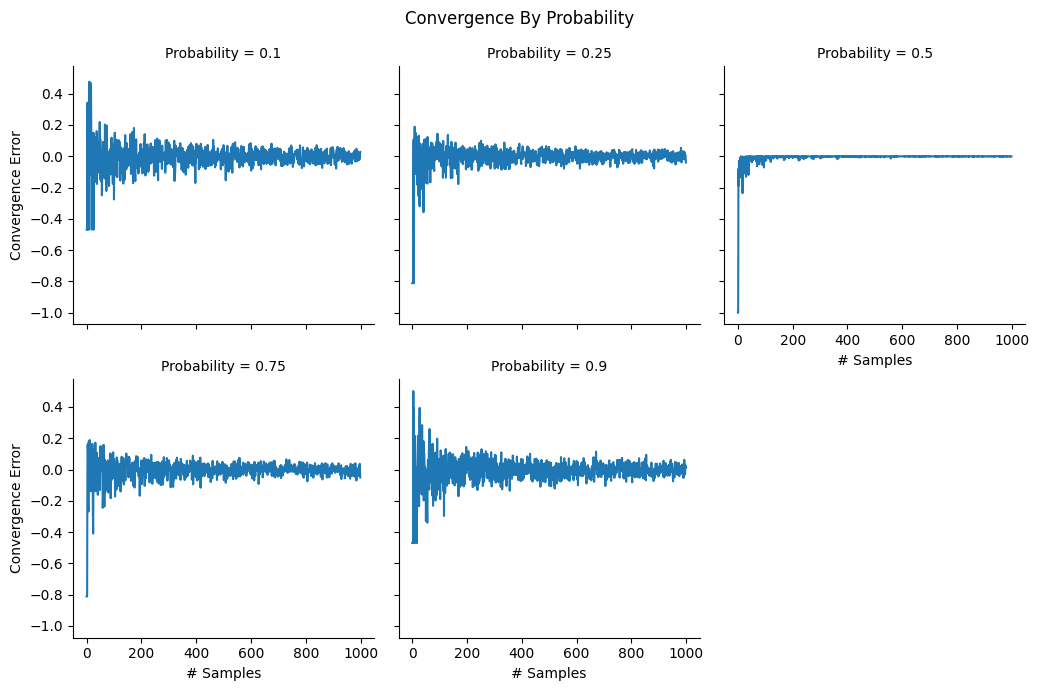

In [ ]:
rel = sns.relplot(kind="line", data=df, x=df.index, y="Convergence Error", col_wrap=3, col="Probability", height=3.5, aspect=1)
rel.fig.suptitle('Convergence By Probability')
rel.set_axis_labels('# Samples')
rel.fig.subplots_adjust(top=0.9)

As expected, we observe a more clear convergence when $P=0.5$,   as this distribution produces less error-prone sequence than a biased one.

### 4. Binary Entropy

- Prove that the following properties of the binary entropy function $h_2(p)$, $p \in (0,1)$:
    - $h_2(p) \leq 1$ with equality if and only if $p=1/2$.
    - $h_2(p) = h_2(1-p)$.
    - $1 - 2|p-1/2| \leq h_2(p)$ with equality for $p=0,1,1/2$.

- Use Stirling's approximation* to the binomial coefficient to argue that
$$
\log_2 \binom{n}{k} = n (h_2(k/n) + o_n(1)),
$$
where $o_n(1)$ is a sequence tending to $0$ as $n \to \infty$. In words, this means that the number of binary strings of length $n$ with exactly $k$ non-zeros is about $2^{n h_2(k/n)}$.

($*$) Stirling's approximation's says
$$
\lim_{n \to \infty}\frac{n!}{\sqrt{2\pi n}\left(\frac{n}{e}\right)^n} = 1.
$$
You will need the less accurate form:
$$
\ln(n!) = n \ln(n) - n + O(\ln(n))
$$

### 4. Solution - Binary Entropy
#### Proves:
1.

We showed in class that $H(X)\leq\log|\mathcal{X}|$ and that equality occurs when $P(x)*|\mathcal{X}|=1$.

In our case $|\mathcal{X}|=2$ hence, $H(X)\leq\log2=1$ for binary entropy.

Also as $P(x)=\frac{1}{2}$, equality occurs as $P(x)*|\mathcal{X}|=1$

2.

$H(1-p)=-(1-p)\log(1-p)-(1-(1-p)\log(1-(1-p))$

$=-(1-p)\log(1-p)-p\log(p)=H(p)$

3.

For $p=0$:
$$1-2|0-1/2|=1-2\cdot1/2=0=0\lg0-\left(1\right)\lg\left(1\right)=h_{2}(0)$$

For $p=1$:
$$1-2|1-1/2|=1-2\cdot1/2=0=1\lg1-\left(0\right)\lg\left(0\right)=h_{2}(1)$$

For $p=\frac{1}{2}$:
$$1-2|1/2-1/2|=1=\lg2=-\lg\frac{1}{2}=-\frac{1}{2}\lg\frac{1}{2}-\frac{1}{2}\lg\frac{1}{2}=h_{2}(\frac{1}{2})$$

For $p∈(0,\frac{1}{2})$:
$$1-2|p-\frac{1}{2}|\underset{p<\frac{1}{2}}{=}1-2\left(-\left(p-\frac{1}{2}\right)\right)=1+2p-1=2p=p+p\underset{*,**}{\le} p\log\frac{1}{p} -(1-p)\log(1-p)=H(p)$$

$(*)$
$$p\lg\frac{1}{p}\underset{p<\frac{1}{2}}{\ge}p\lg2=p$$

$(**)$
Let us define:
$$f(x)=-(1-p)\log(1-p)-p$$

It is sufficient to show that $f(x)≥0, ∀x∈(0,\frac{1}{2})$.

We know that $f(0)=0$ and $f(\frac{1}{2})=0$.As this function is clearly continuous, we can use second derivative test to show that the second derivative is non positive in this range, which will imply that the function is non negative. Imagine a "sad smile" having its edges touching $0$ and $\frac{1}{2}$. It must be non negative.

$$f'\left(x\right)=\log_{2}\left(1-x\right)+\frac{1}{\ln2}-1$$
$$f''\left(x\right)=-\frac{1}{1-x}\underset{0<x<\frac{1}{2}}{<0}$$

For $p∈(\frac{1}{2},1)$ the proof is symmetrical (but not identical), hence proving the former W.L.O.G should suffice. A visual illustration is attached below, where $H(p)$ in blue and $1-2|p-\frac{1}{2}|$ in red.

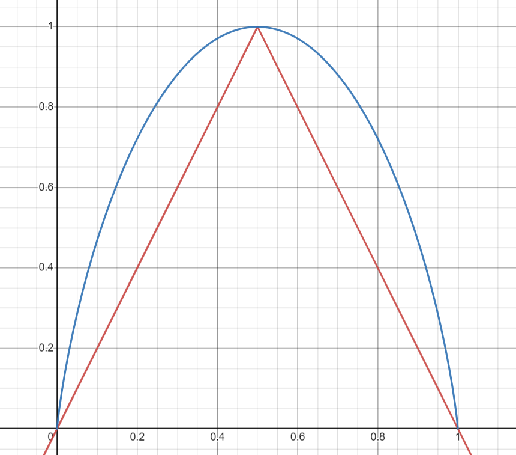


4. binomial coefficient - proof:

**Let's expend $\log_{2}\binom{n}{k}$:**

$\log_{2}\binom{n}{k}=\log\frac{n!}{k!(n-k)!}=\log(n!)-\log(k!)-\log((n-k)!)$

Using Stirling's approximation:

$=n\log n-n+O(\ln(n))-k\log k+k-O(\ln(k))-(n-k)\log(n-k)+n-k-O(\ln(n-k))$

$O(\ln(k)),O(\ln(n-k))\in O(\ln(n))$

$\Rightarrow n\log n-k\log k-(n-k)\log(n-k)+O(\ln(n))$
<br>
<br>
**Now let's expend $n(h_{2}(k/n)+o_{n}(1))$.**

$n(h_{2}(k/n)+o_{n}(1))=n(-\frac{k}{n}\log(\frac{k}{n})-(1-\frac{k}{n})\log(1-\frac{k}{n})+o_{n}(1))$

By the definition of $o_{n}(1)$, we can say that $o_{n}(1)\in\frac{O(\ln(n))}{n}_{n\to\infty}$. Hence:


$n(h_{2}(k/n)+o_{n}(1))=n(-\frac{k}{n}\log(\frac{k}{n})-(1-\frac{k}{n})\log(1-\frac{k}{n})+\frac{O(\ln(n))}{n})$

$=-k\log(\frac{k}{n})-(n-k)\log(\frac{n-k}{n})+O(\ln(n))=-k\log k+k\log n-(n-k)\log(n-k)+(n-k)\log(n)+O(\ln(n))$

$=-k\log k+k\log n-(n-k)\log(n-k)+n\log n-k\log n+O(\ln(n))$

$=n\log n-k\log k-(n-k)\log(n-k)+O(\ln(n))$

$\Rightarrow\log_{2}\binom{n}{k}=nh_{2}(k/n)$



### 5. Random bit generation
In the class we showed that the expected length of any valid extractor $\psi$ obeys
$$
\frac{1}{n}\ex{\ell(\psi(X^n))} \leq h_2(p).
$$
In this question you will build an extractor that approaches this upper bound as $n$ goes to infinity.

- Implement von Neumann's extractor:
    (1) Divide $X^n$ to pairs.
    (2) Output 1 if the pair is (0,1) or (0,1). Otherwise, skip to the next pair.
Demonstrate the extractor's operation by generating $k=1,000$ random bits from $Bern(0.15)$. In order to assess uniformity, plot the histogram of singletons, consecutive pairs, 3-tuples, 4-tuples, and 5-tuples. See example code.
- What is the expected number of samples $n$ from $Bern(0.15)$ required to generate $k=1,000$ random bits with the extractor you implemented? Compare this number to the theoretical upper bound.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def binary_entropy(x):
    return -x * np.log2(x) - (1 - x) * np.log2(1 - x)

def plot_histogram_of_bitstring_values(bitstring, word_length=2):
    """
    Plot a histogram of the values of a bitstring after grouping the bits into
    words of a given length.
    """

    while len(bitstring) % word_length != 0:
        bitstring = bitstring[:-1] # Remove last bit if necessary

    vv = 2 ** (np.arange(0, word_length)) # Vector of powers of 2
    vals2 = bitstring.reshape([-1, word_length]) @ np.expand_dims(vv, 1)  # Compute values of bitstring words

    plt.figure()
    plt.hist(vals2, bins=np.arange(0,2**word_length+1)-.5, density=True)
    plt.title(f"Histogram of bitstring values (word length = {word_length})")
    plt.show()


def random_bits_from_biased_bitstrning(given_bitstring):
    """
    Generate a random bitstring (P(X=1) = 1/2) from a biased bitstring

    Args:
        given_bitstring (np.array): A bitstring where P(X=1) = p != 1/2
    Returns:
        (np.array): A random bitstring where P(X=1) = 1/2
    """
    given_bitstring = given_bitstring.reshape(-1,2)
    condlist = [(given_bitstring == [False, True]).all(axis=1), (given_bitstring == [True, False]).all(axis=1)]
    choicelist = [1,0]
    bitstring = np.select(condlist, choicelist, None)
    bitstring = bitstring[bitstring != None]
    return bitstring

# Another option to implement
#     bitstring = np.where(given_bitstring,[-1,-1],[2,1]).sum(axis=1)
#     return bitstring[np.isin(bitstring,[0,1])]


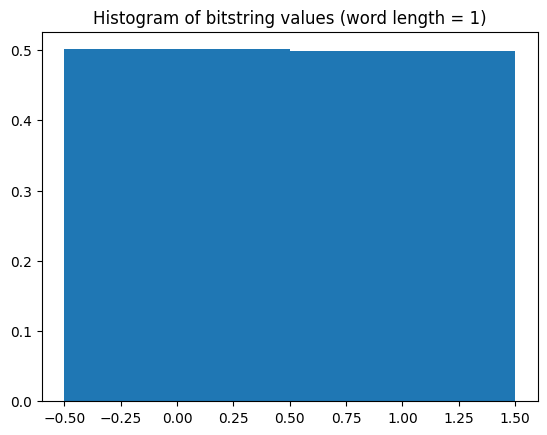

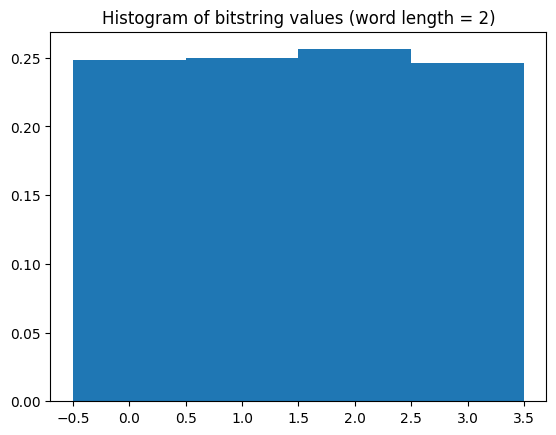

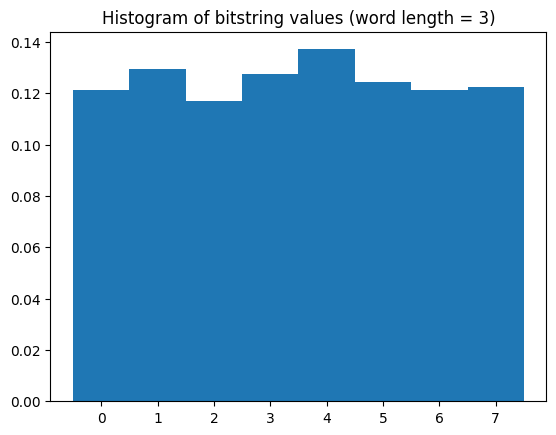

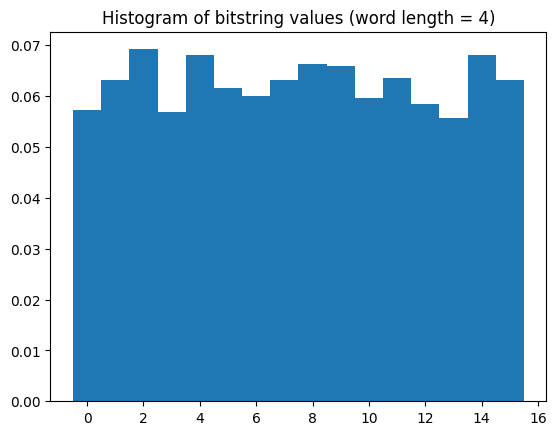

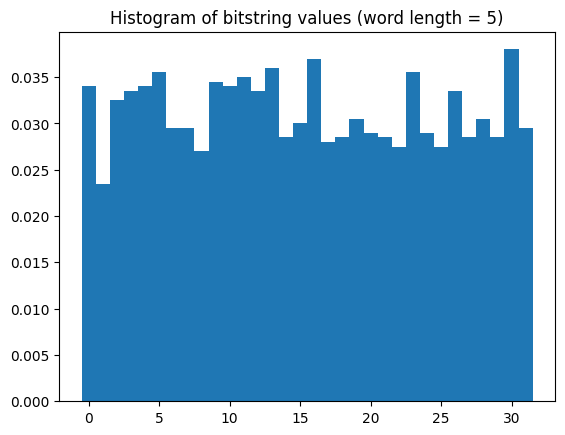

In [ ]:
# The code below generates a random bitstring with P(X=1) = p and plots the histogram of ones and of words
# obtained by concatenating 2 bits, 3 bits, and 4 bits.

n = 10_000
p = 0.5
my_bitstring = np.random.rand(n) < p

plot_histogram_of_bitstring_values(my_bitstring, word_length=1)
plot_histogram_of_bitstring_values(my_bitstring, word_length=2)
plot_histogram_of_bitstring_values(my_bitstring, word_length=3)
plot_histogram_of_bitstring_values(my_bitstring, word_length=4)
plot_histogram_of_bitstring_values(my_bitstring, word_length=5)

In [ ]:
n = 1000
p = 0.15
my_bitstring = np.random.rand(n) < p
bitstring = random_bits_from_biased_bitstrning(my_bitstring)

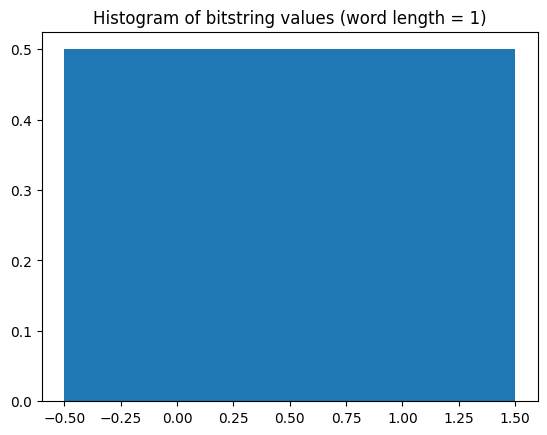

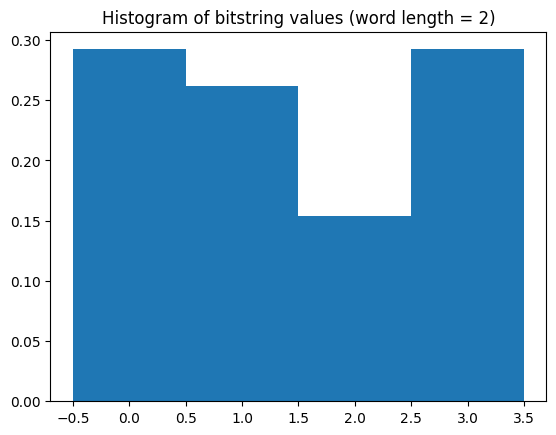

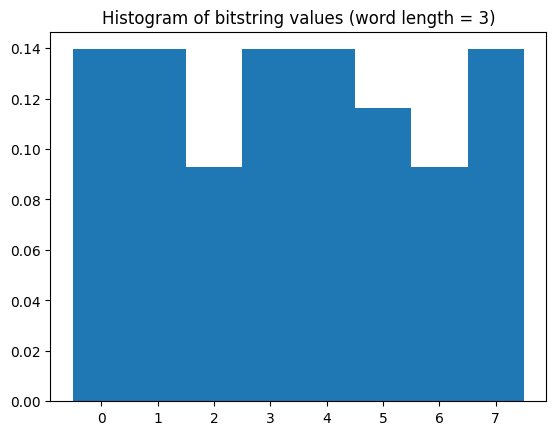

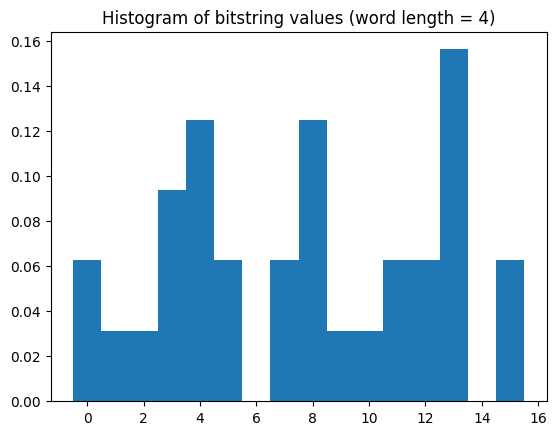

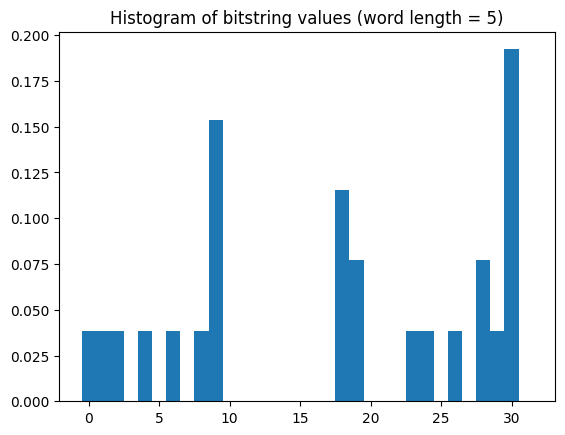

In [ ]:
plot_histogram_of_bitstring_values(bitstring, word_length=1)
plot_histogram_of_bitstring_values(bitstring, word_length=2)
plot_histogram_of_bitstring_values(bitstring, word_length=3)
plot_histogram_of_bitstring_values(bitstring, word_length=4)
plot_histogram_of_bitstring_values(bitstring, word_length=5)

The expected number of samples $n$, when generating $1000$ random bits using von Neumann's extractor can be derived from the equation:

$E[L]=np(1-p)$.

Thus, if the required number of random bits is $L=1000$ and $p=0.15$ $\Longrightarrow n=\frac{1000}{0.15*0.85}\thicksim7843$.

The theoretical upper bound is :
$\frac{1}{h_{2}(p)}E{\ell(\psi(X^{n}))}\leq n\Longrightarrow n\gtrsim1640$